In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

%matplotlib inline

## Данные
загружаем данные по стерлитамаку

In [2]:
data = pd.read_csv('ufa.csv', encoding='utf-8')
data.rename(columns=lambda x: x[5:], inplace=True)

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,14176,19834,11594,19221,18951,16935,8390,10183,10838,18927,15405,13488,13537,14023,14245,15654,17051,13444
1,5090,6190,4349,2030,5705,2282,1997,5037,4292,1655,5825,8799,4480,5810,4849,1673,1563,5251
2,1937,536,1321,572,1797,893,1012,1439,1998,235,2187,1286,1092,1123,1385,1300,1060,1063
3,6576,4627,4916,7586,5061,2884,7237,4499,3536,8135,5395,3961,5102,4833,5270,4797,5236,5759
4,1316,1020,7320,1230,1557,308,1448,584,1102,275,1490,391,2181,514,1444,631,690,1080


In [4]:
golosa = data.sum().reset_index()
golosa = golosa.set_index('index')
golosa.head()

,0
index,
1,29095
2,32207
3,29500
4,30639
5,33071


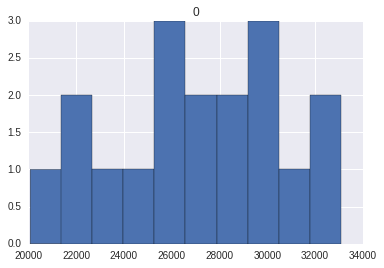

In [5]:
golosaplot = golosa.hist()
# golosaplot.set_title(u"Kolichestvo Golosov po uchastkam")

Распределение голосов по участкам, Медиана: 1254 голоса на участке, в среднем 469 голоса на участок

In [6]:
# data = data[data>50]
# data.head()

In [7]:
data_percent = data.apply(lambda x: (x*100 / x.sum()))
data_percent.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,48.723148,61.582886,39.301695,62.733771,57.303982,72.676165,41.774547,46.835618,49.793256,64.758614,50.838228,48.300806,51.292058,53.313310,52.384805,65.075868,66.605469,50.547054
1,17.494415,19.219424,14.742373,6.625543,17.250764,9.793151,9.943238,23.167142,19.718828,5.662572,19.223154,31.509400,16.974841,22.088735,17.831795,6.954895,6.105469,19.742828
2,6.657501,1.664234,4.477966,1.866902,5.433764,3.832289,5.038837,6.618526,9.179454,0.804051,7.217345,4.605192,4.137617,4.269475,5.093223,5.404282,4.140625,3.996691
3,22.601822,14.366442,16.664407,24.759294,15.303438,12.376620,36.033659,20.692669,16.245521,27.833852,17.804105,14.184423,19.331616,18.374330,19.379987,19.941800,20.453125,21.652818
4,4.523114,3.167013,24.813559,4.014491,4.708052,1.321775,7.209719,2.686045,5.062942,0.940911,4.917167,1.400179,8.263868,1.954150,5.310190,2.623155,2.695312,4.060608


In [8]:
edro = data_percent.transpose()[[0]]
edro = edro.sort_values(by=[0], ascending=[True])
edro = edro.rename(columns={0: 'EDRO'})
edro.describe()

,EDRO
count,18.000000
mean,54.657849
std,9.107886
min,39.301695
25%,48.990675
50%,51.838432
75%,62.446049
max,72.676165


### Участки с большими процентами за едро
http://www.bashkortostan.vybory.izbirkom.ru/bashkortostan/ik/4024049178662

In [9]:
edro.head(5)

,EDRO
3,39.301695
7,41.774547
8,46.835618
12,48.300806
1,48.723148


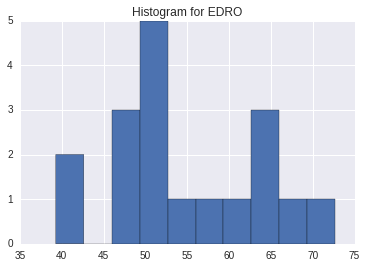

In [10]:
edro.hist()
plt.title('Histogram for EDRO')

Гистограма показывает что на большинстве участков близкое значение в 56%

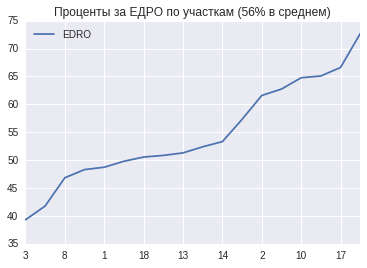

In [11]:
edro.plot(title=u'Проценты за ЕДРО по участкам (56% в среднем)')

Медиана в 56% почти на всех участках... причем настолько ровное распределение соотношения голосов за Единую России, вызывает удивление.

In [12]:
edro['golosa']=golosa
edro.head()

,EDRO,golosa
3,39.301695,29500
7,41.774547,20084
8,46.835618,21742
12,48.300806,27925
1,48.723148,29095


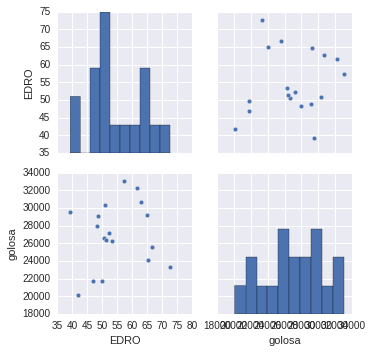

In [13]:
sns.pairplot(edro)

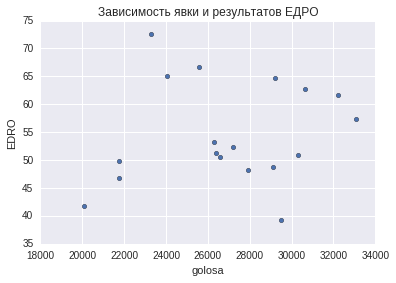

In [14]:
edro.plot.scatter(x='golosa', y='EDRO', title=u'Зависимость явки и результатов ЕДРО')

In [15]:
from statsmodels.graphics.gofplots import qqplot


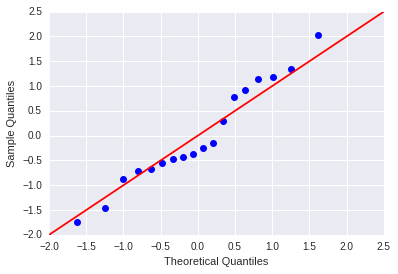

In [28]:
ax = qqplot(edro[['EDRO']],dist=sts.norm, line='45', fit=True);

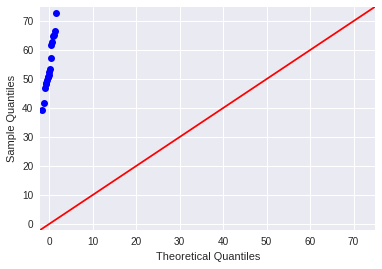

In [29]:
ax = qqplot(edro[['EDRO']],dist=sts.norm, line='45');

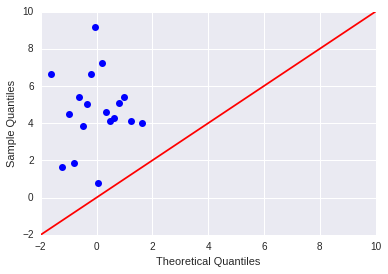

In [27]:
qqplot(data_percent.transpose()[[2]],dist=sts.norm, line='45');